**Problem Statement**
**Predict the percentage of an student based on the no. of study hours. ** bold text

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

**# Import Data **

In [3]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
predict_score=pd.read_csv(url)
predict_score

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Checking the size,shape and type of the data **

In [4]:
print(predict_score.size)
print(predict_score.shape)
print(predict_score.dtypes)


50
(25, 2)
Hours     float64
Scores      int64
dtype: object


**Summarize the data**

In [5]:
print(predict_score.describe())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


**Correlation **

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


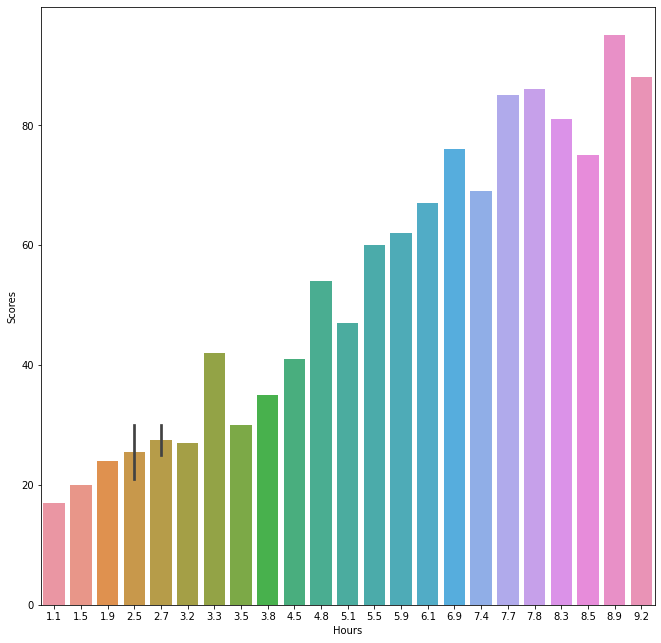

In [6]:
plt.figure(figsize=(11,11))
sns.barplot(predict_score["Hours"],predict_score["Scores"],label="Hours Vs Scores")

**Plot the data**

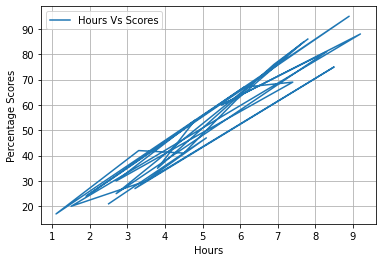

In [7]:
plt.plot(predict_score["Hours"],predict_score["Scores"],label="Hours Vs Scores")
plt.legend(loc="upper left")
plt.xlabel("Hours")
plt.ylabel("Percentage Scores")
plt.grid(which="major",axis="both")
plt.show()

**Preparing the data**

**Test the data**

In [8]:
X = predict_score.iloc[:,:-1].values  
y = predict_score.iloc[:, 1].values  
X.reshape(-1,1)
y.reshape(-1,1)


array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state = 4)


**Trianing the model**

In [19]:
from sklearn.linear_model import  LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Prediction and Regreesion Line**

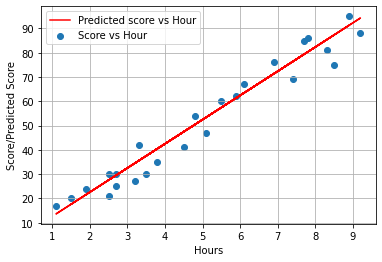

In [20]:
pred_regression_line= (regressor.coef_)*X + regressor.intercept_
plt.scatter(X,y,label="Score vs Hour")
plt.legend()
plt.xlabel("Hours")
plt.ylabel("Score/Predicted Score")
plt.plot(X,pred_regression_line, color="red", label="Predicted score vs Hour")
plt.legend()
plt.grid(which="major",axis="both")


**Making Prediction**


In [21]:
print(X_test)
# Making Prediction 
Y_pred=regressor.predict(X_test)
Y_pred

[[3.8]
 [4.8]
 [2.5]
 [8.5]
 [4.5]
 [7.7]
 [9.2]
 [5.9]]


array([40.5054997 , 50.46249282, 27.56140864, 87.30336737, 47.47539489,
       79.33777287, 94.27326256, 61.41518526])

**Mkaing a comparision between the actual vs predicted**

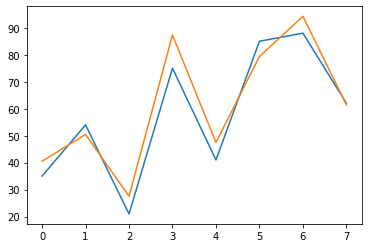

In [22]:
comparison=pd.DataFrame({"Actual": y_test,"Predicted": Y_pred})
plt.plot(comparison)

# Prediction of a new data point for prediction of score

In [23]:
hours = 9.25
print("No of Hours = ",hours)
print("Predicted Score = ", regressor.predict([[9.25]]))

No of Hours =  9.25
Predicted Score =  [94.77111221]


# Evaluation of Model

In [24]:
from sklearn import metrics
print("Mean squared error is", metrics.mean_absolute_error(y_test,Y_pred))

Mean squared error is 5.862935275773163
